# pumb sensor data prediction 

objectives:

Failure prediction

Anomaly detection

Clean beginner-friendly engineering storytelling

Jupyter Notebook

UI later (Streamlit)

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
pumb = pd.read_csv(r"C:\Users\muham\Downloads\python\data\sensor_data.csv")
pumb.head()



,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
print("\n shape of the data : \n ",pumb.shape)
print("\n data type : \n",pumb.dtypes )
print("\n number of missing value in the data : \n", pumb.isnull().sum())
print("\n number of duplicates : \n", pumb.duplicated().sum())
print("\n data info: \n",pumb.info())
print("\n describe data :\n",pumb.describe(include='all'))



 shape of the data : 
  (10000, 14)

 data type : 
 UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

 number of missing value in the data : 
 UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                     

In [5]:
pumb.drop(["Product ID","UDI"],axis=1, inplace= True)

In [6]:
Types = pd.get_dummies(pumb["Type"],drop_first=True)

In [7]:
#pumb.drop(["Type"],axis=1,inplace=True)

In [8]:
pumb = pd.concat([pumb,Types],axis=1)

In [9]:
pumb.dtypes

Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
L                             bool
M                             bool
dtype: object

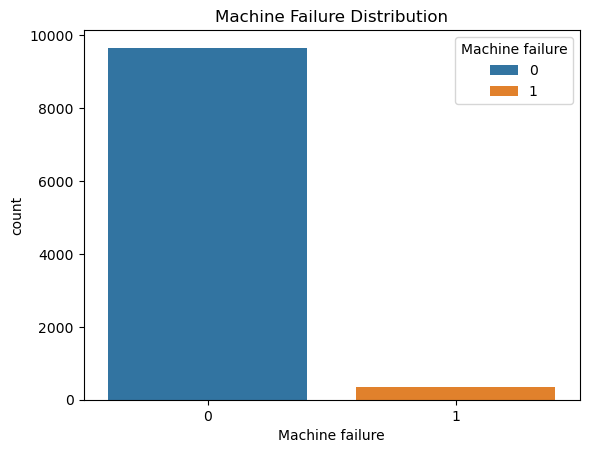




------------------------------------------------------------------------------------------------------------------------------------------------------





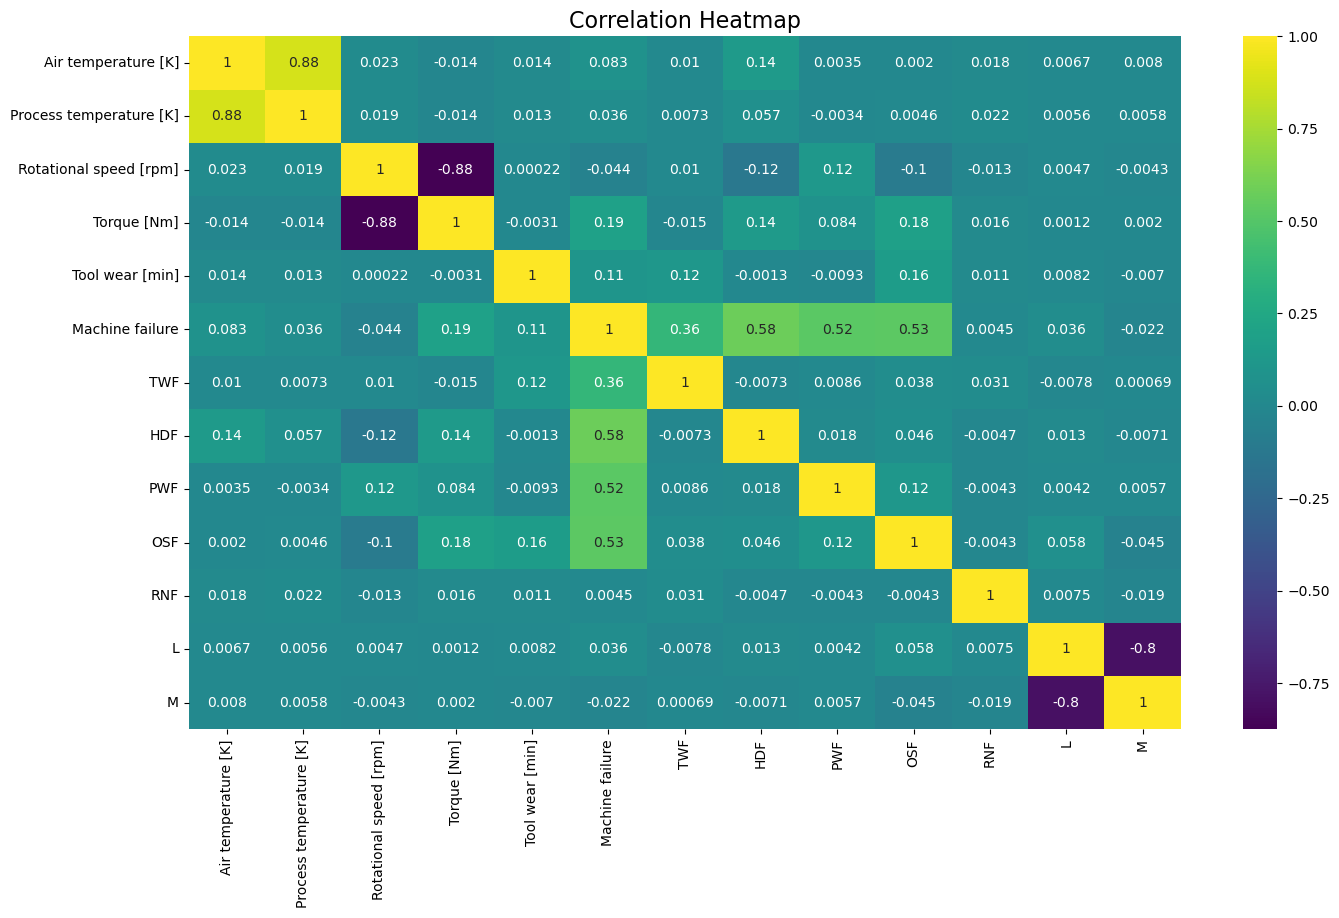

In [10]:
sns.countplot(data=pumb,x="Machine failure",hue="Machine failure")
plt.title("Machine Failure Distribution")
plt.show()


print("\n\n\n" + "-" * 150 + "\n\n\n")

corr = pumb.corr(numeric_only=True)
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True,cmap="viridis")
plt.title("Correlation Heatmap",fontsize=16)
plt.show()

In [11]:
pumb.head(2)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,L,M
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,False,True
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,True,False


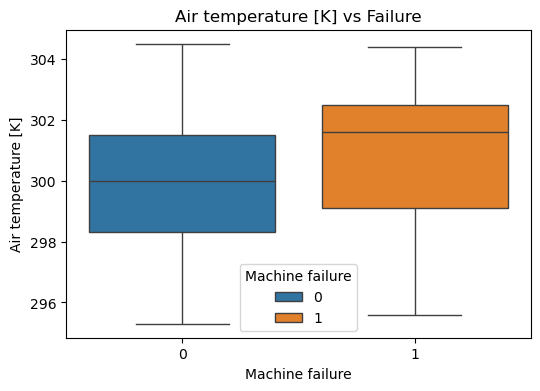

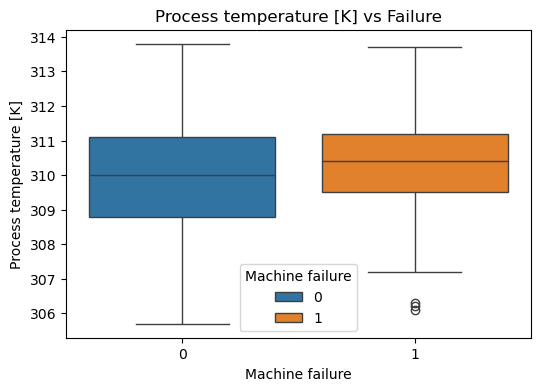

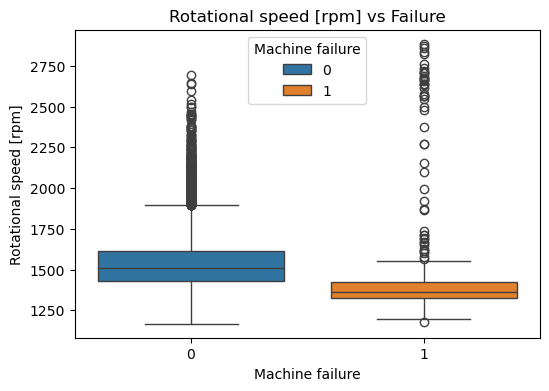

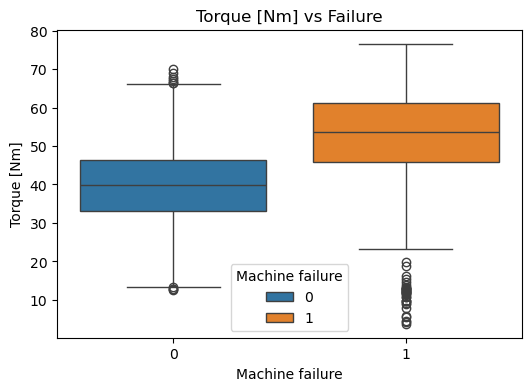

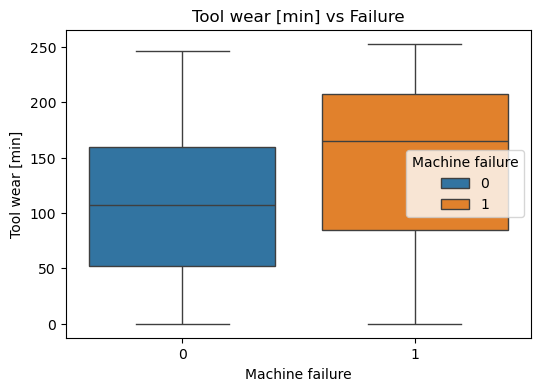

In [12]:
sensor_cols = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]","Torque [Nm]", "Tool wear [min]"]

for col in sensor_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=pumb, x="Machine failure", y=col, hue="Machine failure" )
    plt.title(f"{col} vs Failure")
    plt.show()


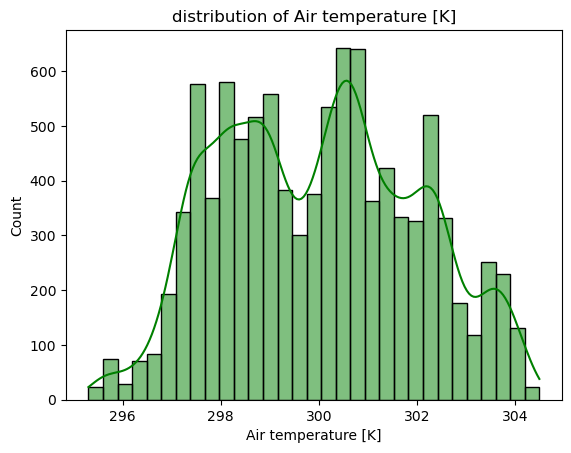

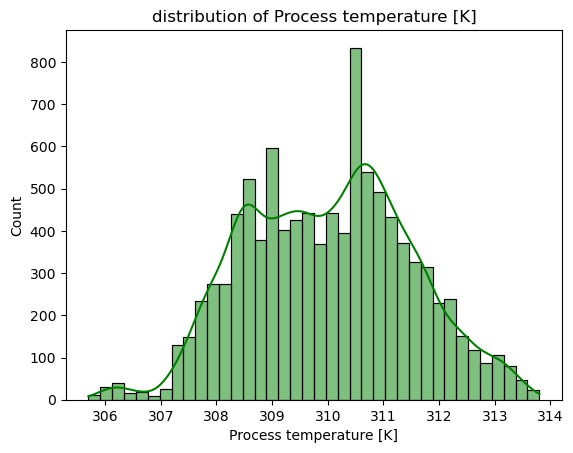

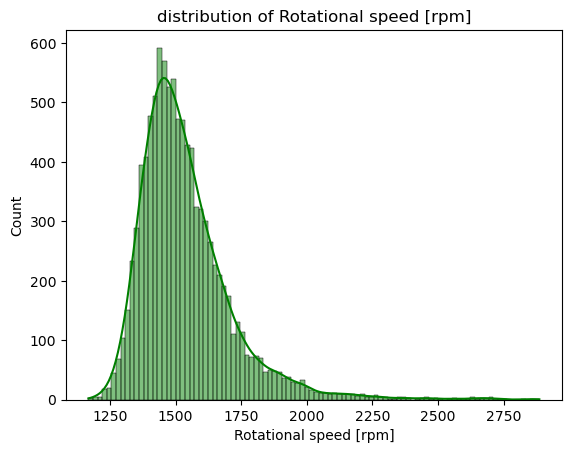

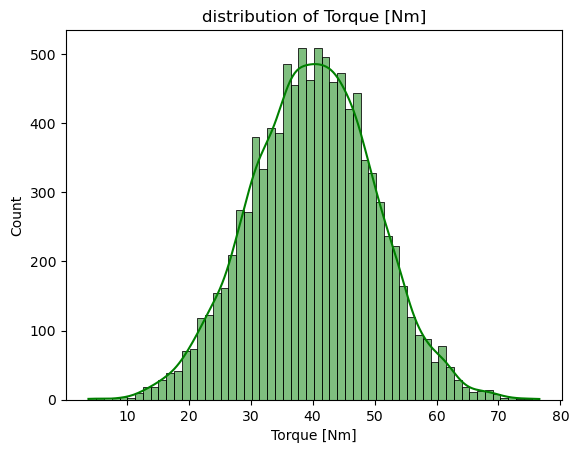

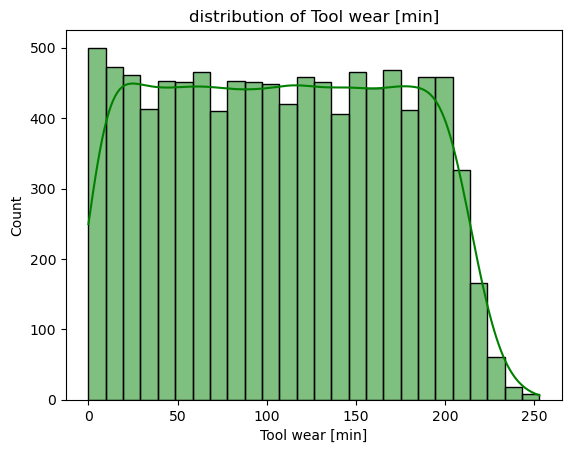

In [13]:
sensor_cols = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]","Torque [Nm]", "Tool wear [min]"]

for col in sensor_cols:

    sns.histplot(pumb[col],kde=True,color="green")
    plt.title(f"distribution of {col}")
    plt.show()

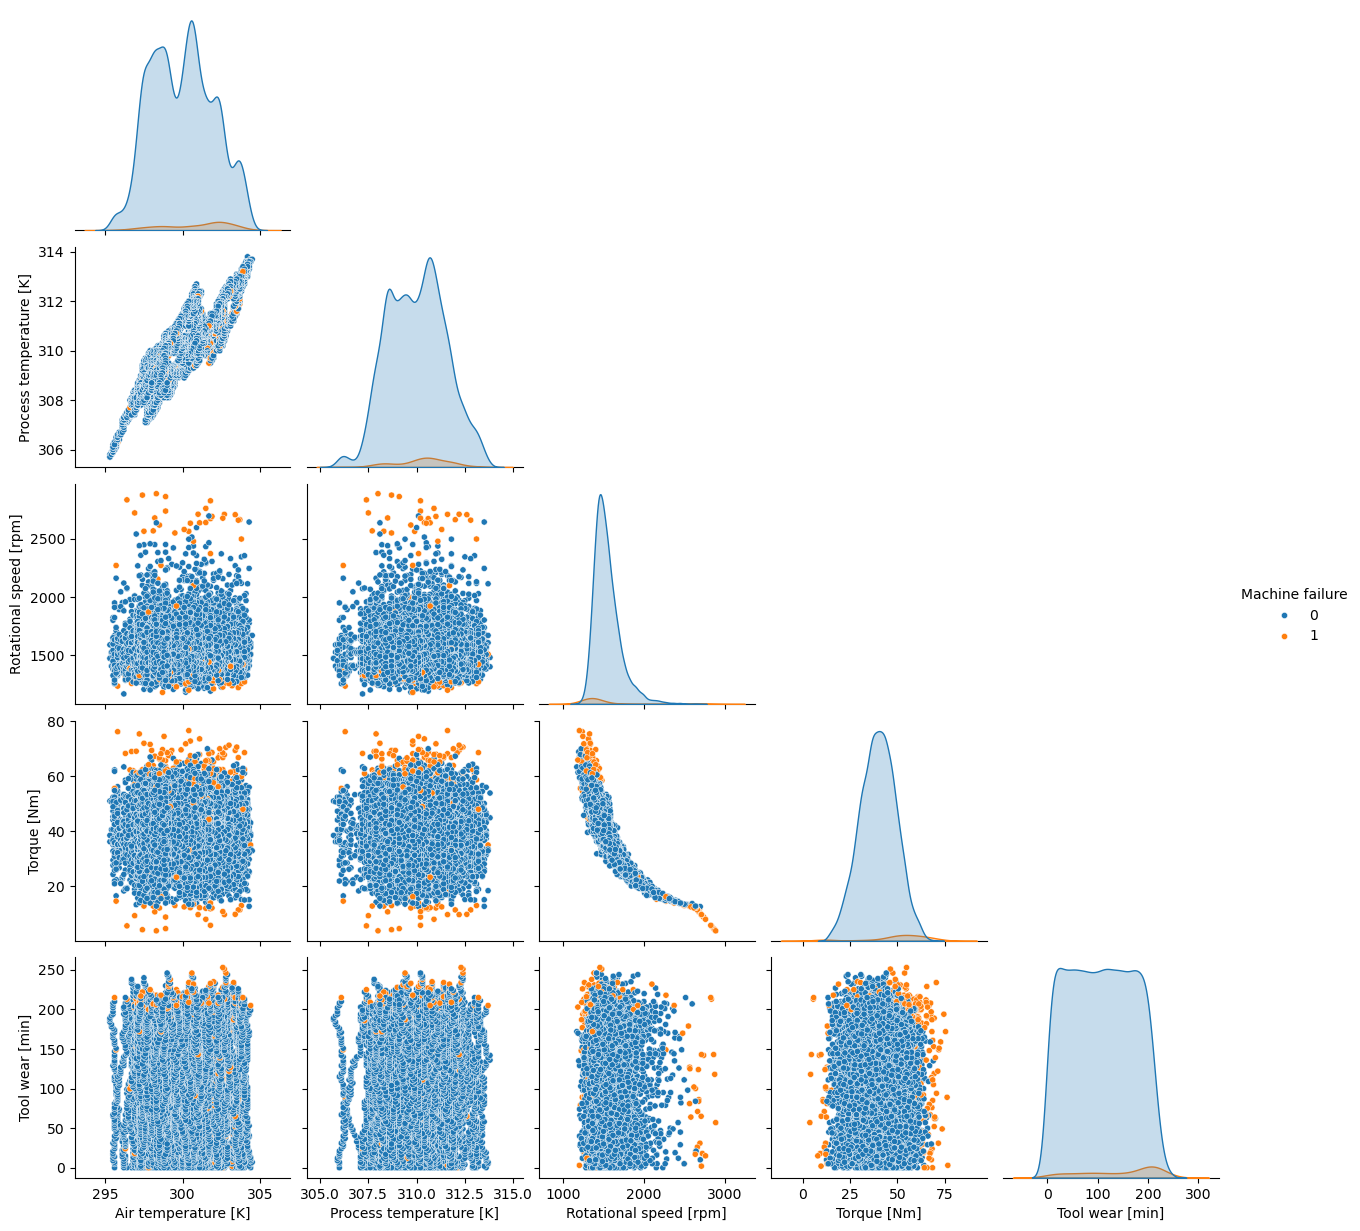

In [14]:
sensor_cols = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]","Torque [Nm]", "Tool wear [min]"]
sns.pairplot(pumb, vars=sensor_cols, hue="Machine failure",plot_kws={'s': 20},corner=True)
plt.show()

In [15]:
pumb = pumb.copy()

In [16]:
#Temprature diff
pumb["temp_diff"] = pumb['Process temperature [K]'] - pumb['Air temperature [K]']

In [17]:

#Torque * Speed
pumb['TorqueSpeed'] = pumb['Torque [Nm]'] * pumb['Rotational speed [rpm]']

In [18]:
#Torque per rpm
pumb['Torque_per_rpm'] = pumb['Torque [Nm]'] / (pumb['Rotational speed [rpm]'].replace(0,np.nan))
pumb['Torque_per_rpm'].fillna(0,inplace=True)

C:\Users\muham\AppData\Local\Temp\ipykernel_37144\967697618.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pumb['Torque_per_rpm'].fillna(0,inplace=True)


In [19]:
# z_score per sensor(Anomaly detection metrix)
sensor_cols = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]","Torque [Nm]", "Tool wear [min]"]

for col in sensor_cols:
    mean = pumb[col].mean()
    std  = pumb[col].std()

    pumb[f"{col}_zscore_abs"] = np.abs((pumb[col] - mean) / (std + 1e-9))

In [20]:
# Tool wear bucket (categorical)
pumb['Tool_wear_bin'] = pd.cut(pumb['Tool wear [min]'], bins = [-1, 60, 140, pumb['Tool wear [min]'].max()], labels = ['low', 'med', 'high'])

In [21]:
# temp diff * tool wear 

pumb["TempDiff_x_ToolWear"] = pumb['temp_diff'] * pumb['Tool wear [min]']

In [41]:
pumb

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,...,Torque_per_rpm,Air temperature [K]_zscore_abs,Process temperature [K]_zscore_abs,Rotational speed [rpm]_zscore_abs,Torque [Nm]_zscore_abs,Tool wear [min]_zscore_abs,Tool_wear_bin,TempDiff_x_ToolWear,anomaly_score,anomaly_flag
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,...,0.027595,0.952342,0.947313,0.068182,0.282186,1.695899,low,0.0,0.169043,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,...,0.032884,0.902348,0.879915,0.729435,0.633276,1.648769,low,31.5,0.179136,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,...,0.032977,0.952342,1.014710,0.227438,0.944242,1.617349,low,52.0,0.147773,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,...,0.027565,0.902348,0.947313,0.589992,0.048843,1.585930,low,72.8,0.184344,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,...,0.028409,0.902348,0.879915,0.729435,0.001313,1.554510,low,94.5,0.172936,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,...,0.018392,0.602387,1.082108,0.363802,1.051959,1.475960,low,134.4,0.136126,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,...,0.019485,0.552394,1.082108,0.519979,0.821242,1.428831,low,161.5,0.160796,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,...,0.020304,0.502400,0.947313,0.592489,0.660744,1.350281,low,211.2,0.169854,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,...,0.034446,0.502400,0.879915,0.729435,0.853962,1.303152,low,242.5,0.183239,0


In [23]:
pumb.dtypes

Type                                    object
Air temperature [K]                    float64
Process temperature [K]                float64
Rotational speed [rpm]                   int64
Torque [Nm]                            float64
Tool wear [min]                          int64
Machine failure                          int64
TWF                                      int64
HDF                                      int64
PWF                                      int64
OSF                                      int64
RNF                                      int64
L                                         bool
M                                         bool
temp_diff                              float64
TorqueSpeed                            float64
Torque_per_rpm                         float64
Air temperature [K]_zscore_abs         float64
Process temperature [K]_zscore_abs     float64
Rotational speed [rpm]_zscore_abs      float64
Torque [Nm]_zscore_abs                 float64
Tool wear [mi

In [24]:
from sklearn.model_selection import train_test_split

x = pumb.drop('Machine failure',axis=1)
y = pumb['Machine failure']

#(stratify = y) will keep class balenced 80/20
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42,stratify = y)


# Identify columns for processing

In [ ]:


# 1) Numeric features (auto-detect)

#numeric_features = x.select_dtypes(include=['int64','float64']).columns.tolist()

# 2) Categorical features (auto-detect)

#categorial_features = x.select_dtypes(include=['object','category']).columns.tolist()

# 1. Manual override numeric_features :

numeric_features = [
    'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
    'Torque [Nm]', 'Tool wear [min]', 'temp_diff', 'TorqueSpeed',
    'Torque_per_rpm', 'Air temperature [K]_zscore_abs',
    'Process temperature [K]_zscore_abs', 'Rotational speed [rpm]_zscore_abs',
    'Torque [Nm]_zscore_abs', 'Tool wear [min]_zscore_abs',
    'TempDiff_x_ToolWear'
]

#2. Manual override categorical_features:

categorical_features = ['Type']


# Create Preprocessing Pipeline

In [26]:


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers =[
        ('num',StandardScaler(),numeric_features),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_features )
    ]
)


# ML Pipeline RandomForestClassifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

model =Pipeline(steps=[
  ('preprocess',preprocessor),
  ('model',RandomForestClassifier(n_estimators = 200, random_state=42))  
]
)

In [28]:
model.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Air temperature [K]',
                                                   'Process temperature [K]',
                                                   'Rotational speed [rpm]',
                                                   'Torque [Nm]',
                                                   'Tool wear [min]',
                                                   'temp_diff', 'TorqueSpeed',
                                                   'Torque_per_rpm',
                                                   'Air temperature '
                                                   '[K]_zscore_abs',
                                                   'Process temperature '
                                                   '[K]_zscore_abs',
                                                   'Rotational speed '
                                                   '[rpm]_zscore_abs',
                                                   'Torque [Nm]_zscore_abs',
                                                   'Tool wear [min]_zscore_abs',
                                                   'TempDiff_x_ToolWear']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type'])])),
                ('model',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [29]:
y_pred = model.predict(x_test)

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1932
           1       0.93      0.78      0.85        68

    accuracy                           0.99      2000
   macro avg       0.96      0.89      0.92      2000
weighted avg       0.99      0.99      0.99      2000



# Save this combined pipeline 

Both random forest and preprocessor 

In [31]:
import joblib

joblib.dump(model, "Final_Failure_model.pkl")
print("Final pipline model is uploded")

Final pipline model is uploded


# Anomaly Detection

Identify unusual temperature, torque, or speed patterns

Visualize anomalies

Create an anomaly score per row

Combine anomaly score into ML later if you want

In [32]:
# MODEL 1 Isolation Forest

from sklearn.ensemble import IsolationForest

In [33]:
# columns represent sensor behavior.

Sensor_col = [
    'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
    'Torque [Nm]','Tool wear [min]', 'temp_diff', 'TorqueSpeed', 'Torque_per_rpm'
    ]

Unsupervised model → it does NOT look at "Machine failure".

It only studies patterns in the raw sensors.

In [34]:
# Train Isolation Forest = Tree-based anomaly detector
# contamination= 0.02 = Assumes 2% of rows are anomalies (we can tune this)

iso = IsolationForest( contamination= 0.02, random_state = 42 )

iso.fit(pumb[Sensor_col]) #Learns patterns from normal sensor behavior

IsolationForest(contamination=0.02, random_state=42)

Predict anomaly scores

Gives a continuous score

High score = normal

Low score = unusual

Output	Meaning

1	Normal

-1	Anomaly

In [35]:
# Predict anomaly score (continuous)
pumb["anomaly_score"] = iso.decision_function(pumb[Sensor_col])

## Predict anomaly label (-1 = anomaly, 1 = normal)
pumb["anomaly_flag"] = iso.predict(pumb[Sensor_col])

# Convert to clear format: 1 = anomaly, 0 = normal
pumb["anomaly_flag"] = pumb["anomaly_flag"].replace({1:0, -1:1})


In [36]:
pumb["anomaly_flag"].value_counts()


anomaly_flag
0    9800
1     200
Name: count, dtype: int64

# Save Isolation Forest separately

It does NOT use the same preprocessing

It operates on selected sensor columns only

Beacuse it is an unsupervised model

In [37]:
joblib.dump(iso, "Isolation_Forest_Model.pkl")
print("Isolation Forest Is Saved")

Isolation Forest Is Saved



Save the feature list for Isolation Forest

In [38]:
iso_features = sensor_cols

import json

with open ("iso_features.json","w") as f:
    json.dump(iso_features, f)

print("iso_features.json saved")

iso_features.json saved


Visualize anomalies

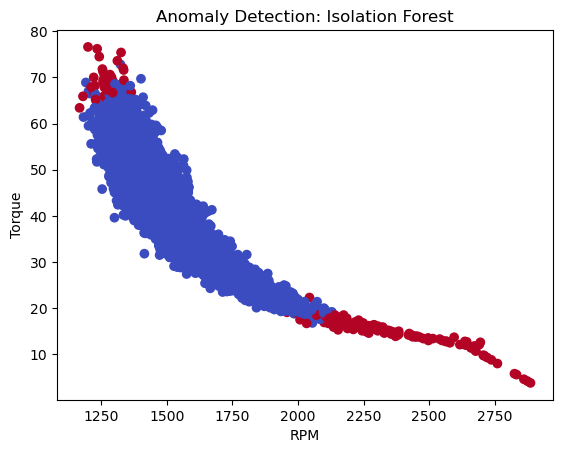

In [39]:
# scatterplot

plt.Figure(figsize=(7,5))
plt.scatter(data=pumb,x="Rotational speed [rpm]", y = "Torque [Nm]", c = "anomaly_flag",cmap="coolwarm")

plt.title("Anomaly Detection: Isolation Forest")
plt.xlabel("RPM")
plt.ylabel("Torque")
plt.show()

Compare anomalies with real failures

This tells:

How many failures were anomalies

How many anomalies did not become failures

In [40]:
pd.crosstab(pumb["Machine failure"],pumb["anomaly_flag"])

anomaly_flag,0,1
Machine failure,,
0,9530,131
1,270,69
